<a href="https://colab.research.google.com/github/humbeaniket2006-max/Ocular_Core_Lite/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title 1. Initialize Ocular-Core Environment
# @markdown This cell sets up the environment by resolving dependency conflicts between Colab's default Python 3.12 and our AI libraries.
# @markdown **Note:** A "Session Crashed" message is expected at the end. This is a deliberate restart to load new libraries.

import os
import sys
import subprocess

print("⏳ Configuring environment... (This resolves Python 3.12 version conflicts)")

# 1. CLEANUP: Force uninstall libraries that often conflict in pre-installed Colab environments.
# We remove 'transformers', 'optimum', etc., to start with a clean slate.
subprocess.check_call([
    sys.executable, "-m", "pip", "uninstall", "-y",
    "transformers", "optimum", "optimum-intel", "openvino",
    "peft", "huggingface-hub", "tokenizers", "diffusers"
])

# 2. INSTALL STABLE STACK: Install a specific set of versions known to work together ("The Goldilocks Stack").
# - huggingface-hub==0.23.5: Pinned to keep the 'LocalEntryNotFoundError' class that peft needs.
# - openvino>=2024.1.0: Required for Python 3.12 compatibility.
# - optimum-intel: The bridge between Transformers and OpenVINO optimization.
subprocess.check_call([
    sys.executable, "-m", "pip", "install",
    "huggingface-hub==0.23.5",       # Fixes 'LocalEntryNotFoundError' error
    "peft==0.11.1",                  # Adapter support for LoRA/LCM
    "transformers==4.41.2",          # Core model architecture
    "optimum-intel[openvino]>=1.17.0", # Intel optimization toolkit
    "openvino>=2024.1.0",            # Inference engine (CPU optimized)
    "diffusers>=0.27.0"              # Diffusion pipeline support
])

# 3. INSTALL PROJECT: Install Ocular-Core-Lite directly from your GitHub source.
print("📦 Installing Ocular-Core-Lite library...")
subprocess.check_call([
    sys.executable, "-m", "pip", "install",
    "git+https://github.com/humbeaniket2006-max/Ocular_Core_Lite.git"
])

print("✅ Dependencies locked. Restarting runtime to apply changes...")

# 4. RESTART RUNTIME: Crucial step!
# Python needs to reload the newly installed libraries. We force a crash/restart to ensure this happens.
os.kill(os.getpid(), 9)

⏳ Configuring environment... (This resolves Python 3.12 version conflicts)
📦 Installing Ocular-Core-Lite library...


In [1]:
# @title 2. Generate Biological Texture
import os

# 1. DIRECTORY CHECK: After the runtime restarts (from Cell 1), Colab resets to the root folder.
# We must navigate back into the project folder so the generator knows where to save files.
if os.path.exists("/content/Ocular_Core_Lite"):
    %cd /content/Ocular_Core_Lite
else:
    print("⚠️ Project folder not found. Did you run Cell 1?")

# 2. INPUT: Define the text prompt for the Latent Consistency Model (LCM).
# We use '8k' and 'photorealistic' keywords to guide the generation quality.
prompt = "extreme macro photo, human eye, amber iris, detailed texture, 8k, photorealistic" # @param {type:"string"}

print(f"👁️ Generating texture for: '{prompt}'...")

# 3. EXECUTE: Run the command-line tool (CLI) installed by your package.
# This triggers the 'ocular-generate' entry point defined in your pyproject.toml.
!ocular-generate "{prompt}"

/content/Ocular_Core_Lite
👁️ Generating texture for: 'extreme macro photo, human eye, amber iris, detailed texture, 8k, photorealistic'...
/usr/local/lib/python3.12/dist-packages/openvino/runtime/__init__.py:10: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
  warnings.warn(
OpenVINO Tokenizer version is not compatible with OpenVINO version. Installed OpenVINO version: 2025.4.1,OpenVINO Tokenizers requires . OpenVINO Tokenizers models will not be added during export.
2025-12-31 13:18:16.690144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767187096.742565   20573 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767187096.763828   

✅ Found generated image: /content/Ocular_Core_Lite/experiments/stress_test_12png.png


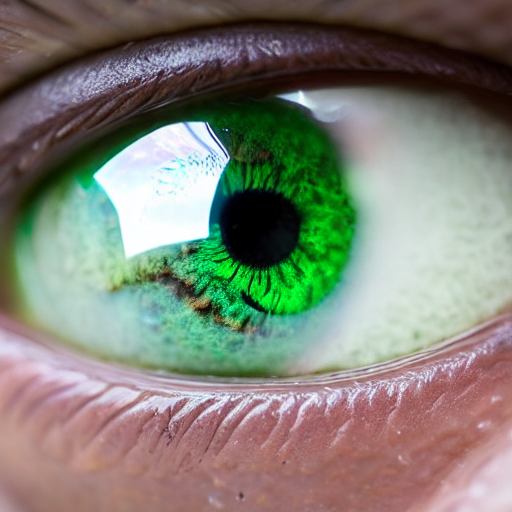

In [2]:
# @title 3. View Result
import glob
import os
from IPython.display import Image, display

# 1. SEARCH: Look for PNG images specifically inside the experiments folder.
# We use a wildcard (*) to find any file ending in .png.
search_path = "/content/Ocular_Core_Lite/experiments/*.png"
list_of_files = glob.glob(search_path)

if list_of_files:
    # 2. FILTER: If multiple images exist, pick the most recently created one.
    # This ensures we always show the result of the *latest* run.
    latest_file = max(list_of_files, key=os.path.getctime)
    print(f"✅ Found generated image: {latest_file}")

    # 3. DISPLAY: Render the image directly in the notebook output.
    display(Image(filename=latest_file))
else:
    # Error handling if generation failed or folder is missing
    print("❌ No images found yet.")
    print(f"Searched in: {search_path}")
    print("Try running Cell 2 again!")